In [122]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import umap
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")

In [2]:
import ast
gsm_df = pd.read_csv('data/cot_data_50_start_sentences.csv')
gsm_df['CoT Sentences'] = gsm_df['CoT Sentences'].apply(ast.literal_eval)

In [3]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

# Our sentences we like to encode
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.']

# Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

# Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: This framework generates embeddings for each input sentence
Embedding: [-1.37173412e-02 -4.28515561e-02 -1.56286638e-02  1.40536716e-02
  3.95537838e-02  1.21796325e-01  2.94333566e-02 -3.17523777e-02
  3.54959853e-02 -7.93140084e-02  1.75878648e-02 -4.04369496e-02
  4.97259758e-02  2.54912935e-02 -7.18701407e-02  8.14969018e-02
  1.47065788e-03  4.79627140e-02 -4.50335741e-02 -9.92174372e-02
 -2.81769671e-02  6.45045936e-02  4.44670580e-02 -4.76217084e-02
 -3.52951698e-02  4.38671932e-02 -5.28565906e-02  4.32968431e-04
  1.01921357e-01  1.64072681e-02  3.26996557e-02 -3.45986336e-02
  1.21339764e-02  7.94870928e-02  4.58342815e-03  1.57777481e-02
 -9.68207326e-03  2.87626460e-02 -5.05806729e-02 -1.55793978e-02
 -2.87907012e-02 -9.62286908e-03  3.15556787e-02  2.27349121e-02
  8.71449262e-02 -3.85027193e-02 -8.84718373e-02 -8.75500031e-03
 -2.12342720e-02  2.08923463e-02 -9.02077556e-02 -5.25732413e-02
 -1.05639296e-02  2.88311280e-02 -1.61455348e-02  6.17838372e-03
 -1.23234

In [4]:
cot_sentences_ex = gsm_df['CoT Sentences'][0]
cot_sentences_ex

["First, let's calculate how many clips Natalia sold in May.",
 'We know that she sold half as many clips in May as she did in April.',
 'So, we can find this by dividing the number of clips she sold in April by 2.',
 '48 clips / 2 = 24 clips\n\nTherefore, Natalia sold 24 clips in May.',
 "Now, let's calculate how many clips she sold altogether in April and May.",
 'We can find this by adding the number of clips she sold in April and the number of clips she sold in May.',
 '48 clips + 24 clips = 72 clips\n\nTherefore, Natalia sold a total of 72 clips in April and May.']

In [32]:
embeddings = []
for i in range(5):
    question = gsm_df['Prompt'][i]
    cot_reasoning = gsm_df['CoT Sentences'][i]
    cot_reasoning.insert(0, question)
    # print(cot_reasoning)
    cot_embeddings = model.encode(cot_reasoning)
    print('Length of Embeddings (with question): ', len(cot_embeddings))
    # print(cot_embeddings)
    embeddings.append(cot_embeddings)
print(embeddings)

Length of Embeddings (with question):  14
Length of Embeddings (with question):  6
Length of Embeddings (with question):  16
Length of Embeddings (with question):  12
Length of Embeddings (with question):  6
[array([[ 0.01614833, -0.02935188,  0.05849994, ..., -0.08215181,
        -0.07501581,  0.02402732],
       [ 0.01614833, -0.02935191,  0.05849995, ..., -0.08215184,
        -0.07501582,  0.02402731],
       [ 0.01614829, -0.02935191,  0.05849995, ..., -0.08215184,
        -0.07501581,  0.02402733],
       ...,
       [ 0.00695811, -0.07209822,  0.02998884, ..., -0.16212104,
        -0.01726041,  0.01400472],
       [-0.02216895, -0.07979284,  0.04609741, ..., -0.061659  ,
        -0.01400952,  0.0438876 ],
       [ 0.01121721, -0.036084  ,  0.03419941, ..., -0.14145063,
        -0.05297242,  0.01044413]], dtype=float32), array([[ 0.02550106,  0.07072035,  0.0451181 , ..., -0.06871481,
         0.0046031 ,  0.02471433],
       [ 0.02550108,  0.07072034,  0.04511807, ..., -0.0687147

In [30]:
gsm_df.head()

,Prompt,CoT Response,Answer,CoT Sentences
0,Natalia sold clips to 48 of her friends in Apr...,"First, let's calculate how many clips Natalia ...",Natalia sold 48/2 = <<48/2=24>>24 clips in May...,"[First, let's calculate how many clips Natalia..."
1,Weng earns $12 an hour for babysitting. Yester...,"To find out how much Weng earned, we need to c...",Weng earns 12/60 = $<<12/60=0.2>>0.2 per minut...,"[To find out how much Weng earned, we need to ..."
2,Betty is saving money for a new wallet which c...,1. The cost of the wallet is $100.\n2. Betty h...,"In the beginning, Betty has only 100 / 2 = $<<...","[1., The cost of the wallet is $100., 2., Bett..."
3,"Julie is reading a 120-page book. Yesterday, s...",Step 1: Calculate how many pages Julie has rea...,Maila read 12 x 2 = <<12*2=24>>24 pages today....,[Step 1: Calculate how many pages Julie has re...
4,James writes a 3-page letter to 2 different fr...,To find the number of pages James writes in a ...,He writes each friend 3*2=<<3*2=6>>6 pages a w...,[To find the number of pages James writes in a...


Embedding Visualization

In [146]:
class two_dimensional_viz:
    def __init__(self, cot_embeddings):
        self.cot_embeddings = cot_embeddings
        
    def pca(self):
        pca = PCA(n_components=2)
        reduced_embeddings = pca.fit_transform(self.cot_embeddings)

        indices = np.arange(len(self.cot_embeddings))
        colormap = plt.cm.viridis
        colors = colormap(indices / max(indices))  # Still need to scale for the colormap
        

        plt.figure(figsize=(5, 5))
        scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=colors)

        for i in range(len(reduced_embeddings) - 1):
            plt.plot(reduced_embeddings[i:i+2, 0], reduced_embeddings[i:i+2, 1], color='grey', alpha=0.5)

        cbar = plt.colorbar(scatter, label='Index in Embeddings Array')
        cbar.set_ticks([0, 1])
        cbar.set_ticklabels(['0', str(len(cot_embeddings)-1)])
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.title('2D Visualization of Embeddings using PCA')

        plt.show()
    
    def umap(self):
        reducer = umap.UMAP()
        umap_embeddings = reducer.fit_transform(self.cot_embeddings)

        indices = np.arange(len(umap_embeddings))

        plt.figure(figsize=(5, 5))
        plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=indices, cmap='viridis', s=15) # s is the size of the dots
        plt.colorbar(label='Index of Embedding')

        for i in range(len(umap_embeddings)-1):
            plt.plot(umap_embeddings[i:i+2, 0], umap_embeddings[i:i+2, 1], color='grey', alpha=0.5) # alpha controls the transparency

        plt.gca().set_aspect('equal', 'datalim')
        plt.xlabel('UMAP Component 1')
        plt.ylabel('UMAP Component 2')
        plt.title('2D Visualization of Embeddings using UMAP', fontsize=12)
        plt.show()

    def tsne(self):
        tsne = TSNE(n_components=2)
        tsne_embeddings = tsne.fit_transform(self.cot_embeddings)

        indices = np.arange(len(tsne_embeddings))
        plt.figure(figsize=(5, 5))

        plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=indices, cmap='viridis', s=15) # s is the size of the dots
        plt.colorbar(label='Index of Embedding')

        for i in range(len(tsne_embeddings)-1):
            plt.plot(tsne_embeddings[i:i+2, 0], tsne_embeddings[i:i+2, 1], color='grey', alpha=0.5) # alpha controls the transparency

        plt.gca().set_aspect('equal', 'datalim')
        plt.xlabel('t-SNE Component 1')
        plt.ylabel('t-SNE Component 2')
        plt.title('2D Visualization of Embeddings using t-SNE', fontsize=12)
        plt.show()



In [147]:
class three_dimensional_viz:
    def __init__(self, cot_embeddings):
        self.cot_embeddings = cot_embeddings
        
    def pca(self):
        pca_3d = PCA(n_components=3)
        reduced_embeddings_3d = pca_3d.fit_transform(self.cot_embeddings)
        colormap = plt.cm.viridis
        indices = np.arange(len(self.cot_embeddings))
        colors_non_normalized = colormap(indices / max(indices))

        fig = plt.figure(figsize=(8, 5))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(reduced_embeddings_3d[:, 0], reduced_embeddings_3d[:, 1], reduced_embeddings_3d[:, 2], c=colors_non_normalized)
        for i in range(len(reduced_embeddings_3d) - 1):
            ax.plot(reduced_embeddings_3d[i:i+2, 0], reduced_embeddings_3d[i:i+2, 1], reduced_embeddings_3d[i:i+2, 2], color='grey', alpha=0.5)


        cbar = plt.colorbar(scatter, label='Index in Embeddings Array')
        cbar.set_ticks([0, 1])
        cbar.set_ticklabels(['0', str(len(cot_embeddings)-1)])
        ax.set_xlabel('PCA Component 1')
        ax.set_ylabel('PCA Component 2')
        ax.set_zlabel('PCA Component 3')
        ax.set_title('3D Visualization of Embeddings using PCA')

        plt.show()
        
    def umap(self):
        reducer = umap.UMAP(n_components=3)
        umap_embeddings_3d = reducer.fit_transform(self.cot_embeddings)

        indices = np.arange(len(umap_embeddings_3d))

        fig = plt.figure(figsize=(8, 5))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(umap_embeddings_3d[:, 0], umap_embeddings_3d[:, 1], umap_embeddings_3d[:, 2], c=indices, cmap='viridis', s=15)

        for i in range(len(umap_embeddings_3d)-1):
            ax.plot(umap_embeddings_3d[i:i+2, 0], umap_embeddings_3d[i:i+2, 1], umap_embeddings_3d[i:i+2, 2], color='grey', alpha=0.5)

        plt.colorbar(scatter, ax=ax, label='Index of Embedding')
        ax.set_xlabel('UMAP Component 1')
        ax.set_ylabel('UMAP Component 2')
        ax.set_zlabel('UMAP Component 3')
        plt.title('3D Visualization of Embeddings using UMAP', fontsize=12)
        plt.show()


    def tsne(self):
        tsne = TSNE(n_components=3)
        tsne_embeddings_3d = tsne.fit_transform(self.cot_embeddings)

        indices = np.arange(len(tsne_embeddings_3d))

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(tsne_embeddings_3d[:, 0], tsne_embeddings_3d[:, 1], tsne_embeddings_3d[:, 2], c=indices, cmap='viridis', s=15)

        for i in range(len(tsne_embeddings_3d)-1):
            ax.plot(tsne_embeddings_3d[i:i+2, 0], tsne_embeddings_3d[i:i+2, 1], tsne_embeddings_3d[i:i+2, 2], color='grey', alpha=0.5)

        plt.colorbar(scatter, ax=ax, label='Index of Embedding')
        ax.set_xlabel('t-SNE Component 1')
        ax.set_ylabel('t-SNE Component 2')
        ax.set_zlabel('t-SNE Component 3')
        plt.title('3D Visualization of Embeddings using t-SNE', fontsize=12)
        plt.show()



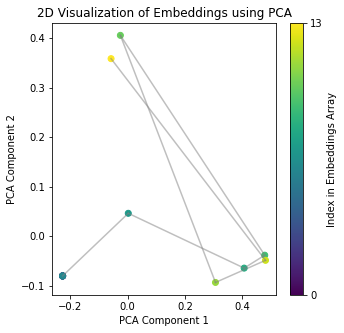

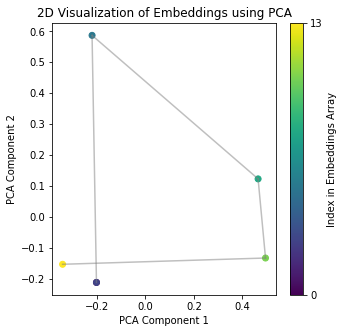

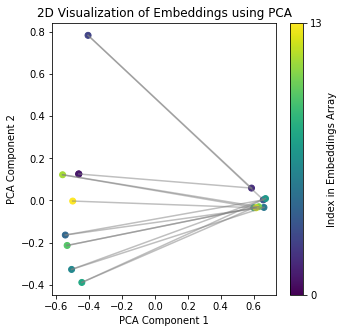

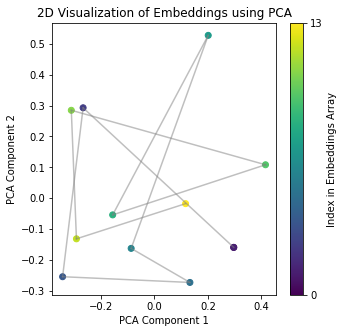

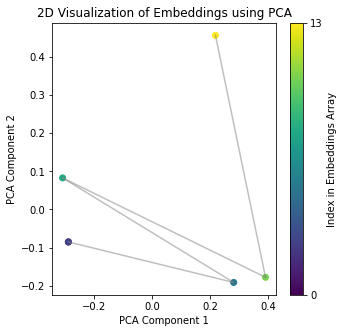

In [151]:
for emb in embeddings:
    viz = two_dimensional_viz(emb)
    viz.pca() # viz.tsne() or viz.umap()

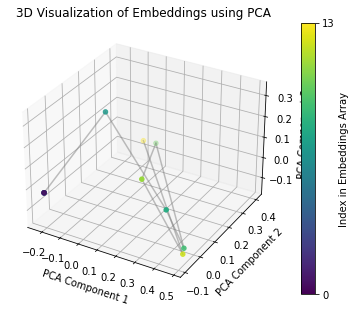

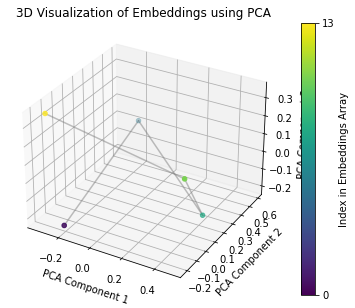

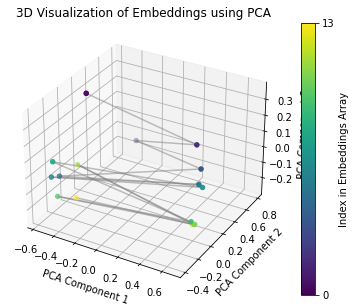

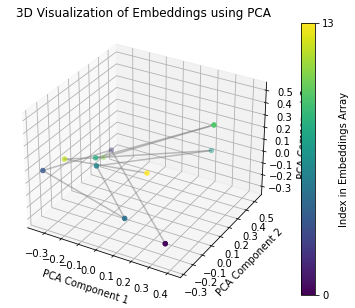

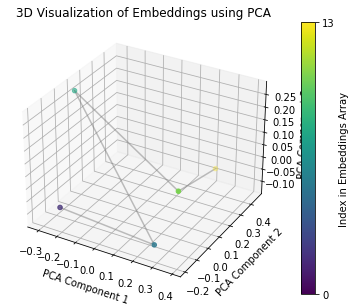

In [155]:
for emb in embeddings:
    viz = three_dimensional_viz(emb)
    viz.pca() # viz.tsne() or viz.umap()